In [1]:
# import modules
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
import pandas as pd
import math
%matplotlib inline

In [3]:
#load edited accepted sample file
#this is created with ipynt Accepted_results
Filename = "Accepted_Final_SM_test1.csv"  #"RPM_dakota_w.dat"
Accept_DF = pd.read_csv(Filename,sep = ",",engine='python')
Accept_DF.head()

,Unnamed: 0,mcmc_id,interface,FR,K,Y,rmse,CRNrmse,Reject,Like
0,0,1,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62,False,-6.57974
1,1,3,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09,False,-6.41606
2,2,4,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01,False,-4.35371
3,3,6,NO_ID,1.198227,-4.001504,-1.469654,1.612860,2213.28,False,-6.37413
4,4,11,NO_ID,2.867350,-2.658376,-1.472506,1.359620,1714.91,False,-4.88589


<Figure size 432x288 with 0 Axes>

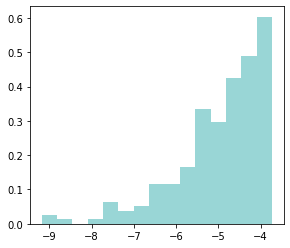

In [4]:
#Plot distribution of loglikelihood values 
fig = plt.figure(1)

plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)

Y=Accept_DF.Like

x, bins, like=ax1.hist(Y,bins=15,density=True,color=[0,0.6,0.6,0.4])

In [5]:
#calculate likelihood values from log-likelihood values and add to dataframe 

likelihoods = np.exp(Accept_DF.Like)

Accept_DF['likelihood'] = likelihoods
Accept_DF.head()

,Unnamed: 0,mcmc_id,interface,FR,K,Y,rmse,CRNrmse,Reject,Like,likelihood
0,0,1,NO_ID,2.000000,-4.000000,-1.400000,0.780884,3530.62,False,-6.57974,0.001388
1,1,3,NO_ID,1.641706,-3.478398,-1.588790,1.831960,1549.09,False,-6.41606,0.001635
2,2,4,NO_ID,1.855062,-3.408226,-1.382437,0.839622,2299.01,False,-4.35371,0.012859
3,3,6,NO_ID,1.198227,-4.001504,-1.469654,1.612860,2213.28,False,-6.37413,0.001705
4,4,11,NO_ID,2.867350,-2.658376,-1.472506,1.359620,1714.91,False,-4.88589,0.007552


In [5]:
#save likelihood file to csv
##Accept_DF.to_csv("Accepted_SY955_likelihoods.csv")
#Accept_DF.head()

<Figure size 432x288 with 0 Axes>

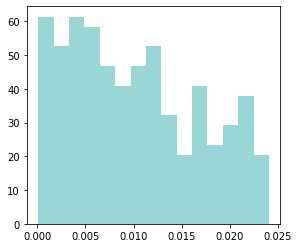

In [6]:
#Plot distribution of likelihood values 
fig = plt.figure(1)

plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)

Y=Accept_DF.likelihood

x, bins, like=ax1.hist(Y,bins=15,density=True,color=[0,0.6,0.6,0.4])

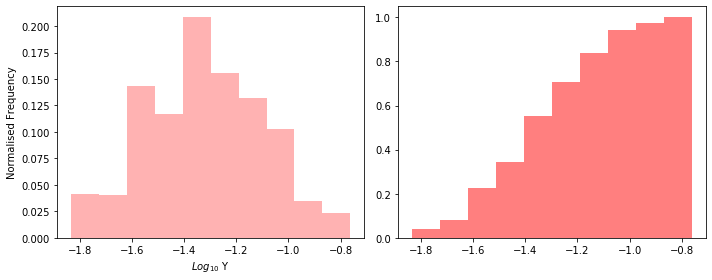

<Figure size 432x288 with 0 Axes>

In [13]:
###########
#plot weighted posterior histograms
###########

#Y parameter histogram 
x1 = Accept_DF.Y

#weightings
loglike_weight = Accept_DF.Like
#likelihood_weight = Accept_DF.likelihood


#Calculate density for non-weighted results 
density1, bins = np.histogram(x1, density=True)
unity_density1 = density1 / density1.sum()

#Calculate density for loglike weighted results
density2, bins = np.histogram(x1, density=True,weights=loglike_weight) 
unity_density2 = density2 / density2.sum()

#Calculate density for likelihood weighted results 
#density3, bins = np.histogram(x1, density=True, weights=likelihood_weight)
#unity_density3 = density3 / density3.sum()

#set up figure 
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,4))
widths = bins[:-1] - bins[1:]

##############
#plot normalised & weighted PDF histograms
#plot unweighted histogram 
#ax1.bar(bins[1:], unity_density1, width=widths, color=[0.4,0.4,0.4,0.5])
#plot loglike weighted histogram
ax1.bar(bins[1:], unity_density2, width=widths, color=['red'], alpha=0.3)
#plot likelihood weighted histogram
#ax1.bar(bins[1:], unity_density3, width=widths, color=['indigo'],alpha=0.3)

#plot CDF axis 2
#plot loglike weighted cumulative DF
ax2.bar(bins[1:], unity_density2.cumsum(), width=widths, color=[1,0,0,0.5], edgecolor='none')

#axis labels 
ax1.set_ylabel('Normalised Frequency')
ax1.set_xlabel('$Log_{10}$ Y')
#ax1.legend(loc='lower left')

plt.tight_layout()
#plt.figure(figsize=(10,4))

fig = plt.gcf()
plt.show()
plt.draw()
#fig.savefig('Y/FR_ratio.png',dpi=300)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

#from scipy.special import boxcox1p

fig = plt.figure(1)

plt.figure(figsize=(10,4))

Y=Accept_DF.Y

#Y_transform=boxcox1p(new_DF.FR,[0])

ax1 = plt.subplot(121) 
ax2 = plt.subplot(122)

Like_weights = Accept_DF.Like


x, bins, Like=ax1.hist(Y,bins=10,density=True,weights=Like_weights,color=[0.2,0.2,0.2,0.5],label='Like weighted')

for item in Like:
    item.set_height(item.get_height()/sum(x))
    
x, bins, Like=ax2.hist(Y,bins=10,density=True,weights=Like_weights,color=[0.2,0.2,0.2,1], histtype='step', cumulative=True, label='Likelihood weighted')

ax1.set_ylim(0,0.25)
fig = plt.gcf()
plt.show()
plt.draw()
#fig.savefig('HistLogLike_Y_K0.png',dpi=300)

In [13]:
#calculate weighted perectiles from posterior samples  

data = (Accept_DF.K)
percents = 5,16,50,84,95

#weightings
W = Accept_DF.likelihood
        
ind=np.argsort(data)

d=data[ind]
w=W[ind]
p=1.*w.cumsum()/w.sum()*100
y=np.interp(percents, p, d)

print (y)

[-4.97709185 -4.91888029 -4.72099534 -4.40916624 -4.18269608]
